In [1]:
# import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

Purpose: Import essential libraries for data manipulation, visualization, and machine learning.


Details:


warnings is used to suppress warnings that might clutter the output.
pandas is used for data manipulation and analysis.
numpy is used for numerical operations.
matplotlib.pyplot and seaborn are used for data visualization.
StandardScaler from sklearn.preprocessing is used to normalize data.
KMeans from sklearn.cluster is used for clustering.
LinearRegression from sklearn.linear_model is imported but not used in the provided code.

In [2]:
#here we have cleaned data from the prior work of data cleaning and exploration data
t2 = pd.read_csv("C:/Users/vipin/OneDrive/Documents/Desktop/Project5/Notebook/cleaned_data.csv")

Purpose: Load the cleaned dataset into a DataFrame t2 for further analysis

In [3]:
t2

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,13114483460844900352,2019-04-04 12:01:18,0.770771,2019-04-25 14:35:31,0.662663,0.980734,0.000229,0.338423,0.355932,...,0.681651,0.113631,0.352502,0.438681,0.329689,0.866255,0.203610,0.532305,0.438030,0.338155
1,1,13114483482878900224,2019-04-09 13:04:04,0.235235,2019-04-25 08:15:48,0.606607,0.733164,0.000308,0.427802,0.358700,...,0.870515,0.868242,0.788437,0.782626,0.721741,0.070697,0.624700,0.909194,0.668468,0.724204
2,2,13114483501243799552,2019-04-13 08:41:59,0.612613,2019-04-25 08:16:21,0.168168,0.555082,0.000229,0.340572,0.875828,...,0.311037,0.085690,0.568850,0.816909,0.053097,0.850601,0.952825,0.643147,0.589066,0.071099
3,3,13042425910865399808,2019-04-14 02:11:59,0.592593,2019-04-25 02:26:52,0.512513,0.509747,0.000155,0.859747,0.873634,...,0.524086,0.896566,0.294871,0.548574,0.887915,0.975290,0.637384,0.465891,0.736213,0.860877
4,4,13042425914669299712,2019-04-15 00:32:15,0.000000,2019-04-25 00:40:17,0.284284,0.462878,0.000036,0.308039,0.356458,...,0.702449,0.298616,0.525002,0.044256,0.961957,0.096093,0.076879,0.773921,0.244338,0.945168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122216,122216,13042425979329300480,2019-04-29 07:28:41,0.615616,2019-04-30 00:01:49,0.407407,0.028315,0.000222,0.357928,0.354017,...,0.281630,0.817879,0.966026,0.324810,0.930040,0.768458,0.381027,0.899250,0.667724,0.909809
122217,122217,7277825670196679680,2019-04-29 07:28:42,0.451451,2019-04-30 06:02:33,0.214214,0.040000,0.000358,0.262900,0.355545,...,0.696143,0.534408,0.768887,0.893976,0.624352,0.555426,0.003854,0.814516,0.720209,0.635442
122218,122218,7349883264234609664,2019-04-29 07:28:42,0.483483,2019-04-30 10:41:33,0.187187,0.049038,0.000308,0.330422,0.357345,...,0.596636,0.376532,0.831935,0.967345,0.743252,0.285950,0.844371,0.148419,0.470268,0.739067
122219,122219,13114483573367300096,2019-04-29 07:28:43,0.283283,2019-04-30 10:46:12,0.810811,0.049189,0.000274,0.110523,0.357961,...,0.974264,0.084309,0.428386,0.230136,0.656281,0.808894,0.143565,0.683305,0.413196,0.656298


In [4]:
def plot_hist(t2: pd.DataFrame, column: str, color: str) -> None:
    """Plot histogram with KDE for a given column."""
    if column not in t2.columns:
        print(f"Column {column} not found in DataFrame")
        return
    g = sns.displot(data=t2, x=column, color=color, kde=True, height=7, aspect=2)
    g.figure.suptitle(f'Distribution of {column}', size=20, fontweight='bold')
    g.figure.subplots_adjust(top=0.9)
    plt.show()

def plot_count(t2: pd.DataFrame, column: str) -> None:
    """Plot count distribution for a categorical column."""
    if column not in t2.columns:
        print(f"Column {column} not found in DataFrame")
        return
    plt.figure(figsize=(12, 7))
    sns.countplot(data=t2, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_bar(t2: pd.DataFrame, x_col: str, y_col: str, title: str, xlabel: str, ylabel: str) -> None:
    """Plot bar plot for two columns."""
    if x_col not in t2.columns or y_col not in t2.columns:
        print(f"Columns {x_col} or {y_col} not found in DataFrame")
        return
    plt.figure(figsize=(12, 7))
    sns.barplot(data=t2, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(t2: pd.DataFrame, title: str, cbar=False) -> None:
    """Plot heatmap for the DataFrame."""
    plt.figure(figsize=(12, 7))
    sns.heatmap(t2.corr(), annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar)
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(t2: pd.DataFrame, x_col: str, title: str) -> None:
    """Plot box plot for a single column."""
    if x_col not in t2.columns:
        print(f"Column {x_col} not found in DataFrame")
        return
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=t2, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(t2: pd.DataFrame, x_col: str, y_col: str, title: str) -> None:
    """Plot box plot for two columns."""
    if x_col not in t2.columns or y_col not in t2.columns:
        print(f"Columns {x_col} or {y_col} not found in DataFrame")
        return
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=t2, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

def plot_scatter(t2: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    """Plot scatter plot for two columns with hue and style."""
    if x_col not in t2.columns or y_col not in t2.columns:
        print(f"Columns {x_col} or {y_col} not found in DataFrame")
        return
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=t2, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

def format_float(value):
    """Format float value to 2 decimal places with commas."""
    return f'{value:,.2f}'

def fix_outlier(t2: pd.DataFrame, column: str) -> pd.Series:
    """Replace outliers in a column with the median."""
    if column not in t2.columns:
        print(f"Column {column} not found in DataFrame")
        return t2[column]
    t2[column] = np.where(t2[column] > t2[column].quantile(0.95), t2[column].median(), t2[column])
    return t2[column]

pd.options.display.float_format = format_float


# User Engagement Analysis

Task 2.1 - Engagement Metrics Aggregation and K-Means Clustering

In [5]:
t2['TotalTraffic'] = t2['Total DL (Bytes)'] + t2['Total UL (Bytes)']
print(t2['TotalTraffic'])

0        0.78
1        1.39
2        0.66
3        1.60
4        1.19
         ... 
122216   1.58
122217   1.36
122218   1.21
122219   1.07
122220   0.75
Name: TotalTraffic, Length: 122221, dtype: float64


In [6]:
agg_data = t2.groupby('MSISDN/Number').agg({
    'Dur. (ms)': ['count', 'sum', 'mean'],
    'TotalTraffic': 'sum'
}).reset_index()

agg_data

MSISDN/Number Dur. (ms)           TotalTraffic
                        count  sum mean          sum
0              0.00         1 0.06 0.06         1.36
1              0.00         1 0.09 0.09         0.56
2              0.00         1 0.02 0.02         0.66
3              0.00         2 0.01 0.01         2.67
4              0.00         1 0.07 0.07         0.73
...             ...       ...  ...  ...          ...
88446          1.00         1 0.05 0.05         1.28
88447          1.00         1 0.08 0.08         0.59
88448          1.00         1 0.01 0.01         0.90
88449          1.00         1 0.00 0.00         1.07
88450          1.00         1 0.07 0.07         0.91

[88451 rows x 5 columns]

In [7]:
agg_data.columns = ['MSISDN', 'SessionFrequency', 'TotalSessionDuration', 'AverageSessionDuration', 'TotalTraffic']

In [8]:
agg_data

,MSISDN,SessionFrequency,TotalSessionDuration,AverageSessionDuration,TotalTraffic
0,0.00,1,0.06,0.06,1.36
1,0.00,1,0.09,0.09,0.56
2,0.00,1,0.02,0.02,0.66
3,0.00,2,0.01,0.01,2.67
4,0.00,1,0.07,0.07,0.73
...,...,...,...,...,...
88446,1.00,1,0.05,0.05,1.28
88447,1.00,1,0.08,0.08,0.59
88448,1.00,1,0.01,0.01,0.90
88449,1.00,1,0.00,0.00,1.07


Purpose: Aggregate user engagement metrics and prepare data for clustering.

Details:

TotalTraffic is calculated as the sum of download and upload bytes.
Aggregated data includes session frequency, total session duration, average session duration, and total traffic.

In [9]:
top_10_freq = agg_data.nlargest(10, 'SessionFrequency')
top_10_duration = agg_data.nlargest(10, 'TotalSessionDuration')
top_10_traffic = agg_data.nlargest(10, 'TotalTraffic')


Purpose: Identify top 10 users based on different engagement metrics.

Details: This helps in understanding which users are most engaged according to each metric

In [10]:
top_10_freq.head(10)


,MSISDN,SessionFrequency,TotalSessionDuration,AverageSessionDuration,TotalTraffic
44490,0.33,739,20.10,0.03,748.57
10706,0.13,16,8.95,0.56,16.10
30783,0.31,16,2.12,0.13,15.31
63457,0.40,15,2.57,0.17,15.05
54220,0.35,13,4.67,0.36,12.45
5234,0.07,11,3.22,0.29,11.99
71762,0.52,11,2.75,0.25,13.17
550,0.01,10,2.78,0.28,8.45
10980,0.13,10,2.72,0.27,10.06
11318,0.14,10,1.27,0.13,10.14


In [11]:
top_10_duration.head(10)

,MSISDN,SessionFrequency,TotalSessionDuration,AverageSessionDuration,TotalTraffic
44490,0.33,739,20.10,0.03,748.57
10706,0.13,16,8.95,0.56,16.10
54220,0.35,13,4.67,0.36,12.45
5234,0.07,11,3.22,0.29,11.99
54993,0.35,6,3.03,0.50,5.81
550,0.01,10,2.78,0.28,8.45
71762,0.52,11,2.75,0.25,13.17
10980,0.13,10,2.72,0.27,10.06
31145,0.31,10,2.60,0.26,7.36
71510,0.52,4,2.60,0.65,2.99


In [12]:
top_10_traffic.head(10)

,MSISDN,SessionFrequency,TotalSessionDuration,AverageSessionDuration,TotalTraffic
44490,0.33,739,20.10,0.03,748.57
10706,0.13,16,8.95,0.56,16.10
30783,0.31,16,2.12,0.13,15.31
63457,0.40,15,2.57,0.17,15.05
71762,0.52,11,2.75,0.25,13.17
54220,0.35,13,4.67,0.36,12.45
47594,0.34,10,1.44,0.14,12.21
5234,0.07,11,3.22,0.29,11.99
78411,0.85,10,1.84,0.18,11.15
11318,0.14,10,1.27,0.13,10.14


# Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(agg_data[['SessionFrequency', 'TotalSessionDuration', 'TotalTraffic']])

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
agg_data['Cluster'] = kmeans.fit_predict(scaled_data)


Purpose: Normalize the data and apply K-Means clustering to classify users into engagement clusters.

Details:

StandardScaler normalizes data for consistent scaling.
KMeans clustering is used to segment users into 3 clusters based on engagement metrics.

In [15]:
print(kmeans.cluster_centers_)

[[-7.09546568e-02 -1.51716986e-01 -7.06026459e-02]
 [ 2.83580748e+02  1.79630649e+02  2.81319752e+02]
 [ 6.74085582e-01  1.49440222e+00  6.70847594e-01]]


In [16]:
cluster_stats = agg_data.groupby('Cluster').agg({
    'SessionFrequency': ['min', 'max', 'mean', 'sum'],
    'TotalSessionDuration': ['min', 'max', 'mean', 'sum'],
    'TotalTraffic': ['min', 'max', 'mean', 'sum']
})

In [17]:
cluster_stats

SessionFrequency                    TotalSessionDuration              \
                     min  max   mean    sum                  min   max  mean   
Cluster                                                                        
0                      1    4   1.20  96165                 0.00  0.19  0.05   
1                    739  739 739.00    739                20.10 20.10 20.10   
2                      1   16   3.13  25317                 0.05  8.95  0.23   

                 TotalTraffic                          
             sum          min    max   mean       sum  
Cluster                                                
0       3,941.34         0.07   5.68   1.19 95,666.80  
1          20.10       748.57 748.57 748.57    748.57  
2       1,876.92         0.28  16.10   3.16 25,518.13

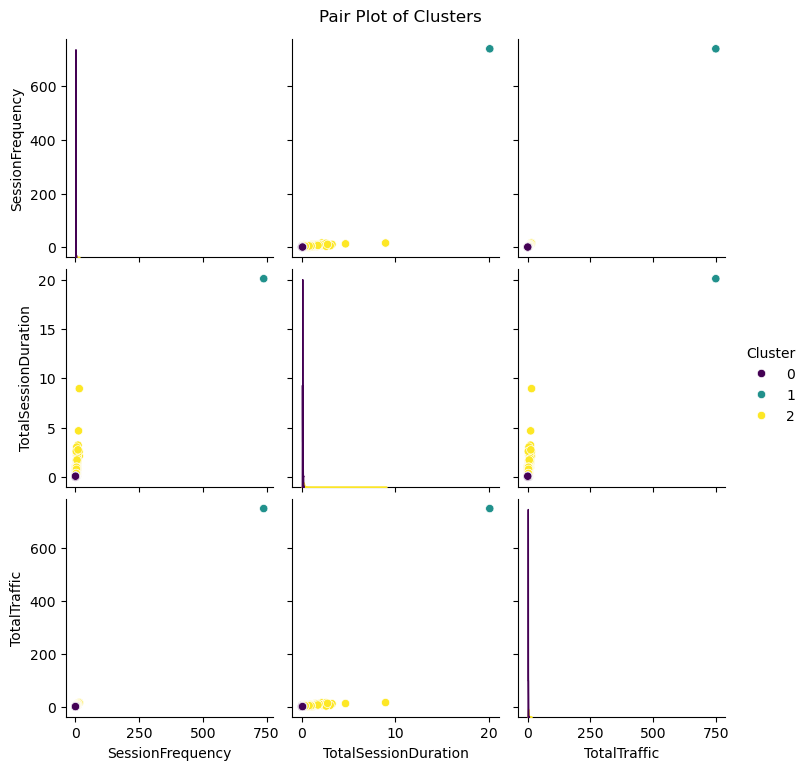

In [18]:
# Create a pair plot
sns.pairplot(agg_data, hue='Cluster', vars=['SessionFrequency', 'TotalSessionDuration', 'TotalTraffic'], palette='viridis')
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()


Purpose: Visualize the clusters using a pair plot.

Details: Helps in understanding how different engagement metrics are distributed across clusters.

In [19]:
def total_data(t2):
    cols = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
            'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
            'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
            'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
    t2['Social Media'] = t2[cols[0]] + t2[cols[1]]
    t2['Google'] = t2[cols[2]] + t2[cols[3]]
    t2['Email'] = t2[cols[4]] + t2[cols[5]]
    t2['Youtube'] = t2[cols[6]] + t2[cols[7]]
    t2['Netflix'] = t2[cols[8]] + t2[cols[9]]
    t2['Gaming'] = t2[cols[10]] + t2[cols[11]]
    t2['Other'] = t2[cols[12]] + t2[cols[13]]
    t2['Total'] = t2[cols[14]] + t2[cols[15]]
    return t2
data = total_data(t2)

In [20]:
app_traffic = data[['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']].sum()

In [21]:
app_traffic = app_traffic.reset_index()
app_traffic.columns = ['Application', 'TotalTraffic']

Purpose: Aggregate traffic data for different applications.

Details: Sum the traffic for each application and prepare the data for further analysis.

In [22]:
# Get the top 3 applications by total traffic
top_3_apps = app_traffic.nlargest(3, 'TotalTraffic')

In [23]:
print(top_3_apps)

    Application  TotalTraffic
1        Google    122,273.40
0  Social Media    122,265.75
3       Youtube    122,256.44


Purpose: Identify the top 3 applications based on total traffic.

Details: Useful for understanding which applications consume the most traffic.

In [24]:
top_users_per_app = data.melt(id_vars=['MSISDN/Number'], value_vars=['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other'],
                             var_name='Application', value_name='app_traffic')

In [25]:
top_10_users_per_app = top_users_per_app.groupby(['Application', 'MSISDN/Number']).agg({'app_traffic': 'sum'}).reset_index()
top_10_users_per_appp = top_10_users_per_app.groupby('Application').apply(lambda x: x.nlargest(10, 'app_traffic')).reset_index(drop=True)


Purpose: Find top 10 users for each application based on traffic consumption.

Details: Helps identify the most active users per application.

In [26]:
top_10_users_per_appp.head(10)

,Application,MSISDN/Number,app_traffic
0,Email,0.33,736.40
1,Email,0.13,16.80
2,Email,0.31,14.85
3,Email,0.40,14.49
4,Email,0.35,14.03
5,Email,0.07,12.17
6,Email,0.52,11.96
7,Email,0.31,11.84
8,Email,0.13,11.49
9,Email,0.01,10.98


In [27]:
app_traffic = data.groupby('Google').agg({'TotalTraffic': 'sum'})
top_3_appsG = app_traffic.nlargest(3, 'TotalTraffic')

In [28]:
top_3_appsG

,TotalTraffic
Google,
1.81,1.94
1.14,1.92
0.99,1.90


In [29]:
top_users_per_app = data.groupby(['Google', 'MSISDN/Number']).agg({'TotalTraffic': 'sum'}).reset_index()
top_10_users_per_appG = top_users_per_app.groupby('Google').apply(lambda x: x.nlargest(10, 'TotalTraffic'))

In [30]:
top_10_users_per_appG.head(10)

Google  MSISDN/Number  TotalTraffic
Google                                       
0.01   0    0.01           0.35          1.27
       1    0.01           0.46          0.68
       2    0.01           0.36          0.35
       3    0.01           0.39          0.98
       4    0.01           0.86          0.81
       5    0.01           0.22          1.10
       6    0.01           0.30          1.10
       7    0.01           0.34          0.90
       8    0.01           0.86          1.07
       9    0.01           0.36          0.47

In [31]:
app_traffic = data.groupby('Social Media').agg({'TotalTraffic': 'sum'})
top_3_appsS = app_traffic.nlargest(3, 'TotalTraffic')

In [32]:
top_3_appsS

,TotalTraffic
Social Media,
0.87,1.94
0.36,1.92
0.22,1.90


In [33]:
top_users_per_app = data.groupby(['Social Media', 'MSISDN/Number']).agg({'TotalTraffic': 'sum'}).reset_index()
top_10_users_per_appG = top_users_per_app.groupby('Social Media').apply(lambda x: x.nlargest(10, 'TotalTraffic'))

In [34]:
top_10_users_per_appG.head(10)

Social Media  MSISDN/Number  TotalTraffic
Social Media                                             
0.00         0          0.00           0.34          0.81
             1          0.00           0.26          1.27
0.01         2          0.01           0.30          0.59
             3          0.01           0.30          0.52
             4          0.01           0.11          1.35
             5          0.01           0.33          1.28
             6          0.01           0.35          1.24
             7          0.01           0.08          1.55
             8          0.01           0.94          0.66
             9          0.01           0.04          1.41

In [35]:
app_traffic = data.groupby('Email').agg({'TotalTraffic': 'sum'})
top_3_appsE = app_traffic.nlargest(3, 'TotalTraffic')

In [36]:
top_3_appsE

,TotalTraffic
Email,
1.35,1.94
1.26,1.92
1.30,1.90


In [37]:
top_users_per_app = data.groupby(['Email', 'MSISDN/Number']).agg({'TotalTraffic': 'sum'}).reset_index()
top_10_users_per_appE = top_users_per_app.groupby('Email').apply(lambda x: x.nlargest(10, 'TotalTraffic'))

In [38]:
top_10_users_per_appE.head(10)

Email  MSISDN/Number  TotalTraffic
Email                                      
0.01  0   0.01           0.06          1.66
      1   0.01           0.84          1.26
      2   0.01           0.32          0.93
      3   0.01           0.11          0.91
      4   0.01           0.88          0.79
      5   0.01           0.80          0.91
      6   0.01           0.01          1.28
      7   0.01           0.34          0.75
      8   0.01           0.31          0.74
      9   0.01           0.85          1.51

In [39]:
app_traffic = data.groupby('Youtube').agg({'TotalTraffic': 'sum'})
top_3_appY = app_traffic.nlargest(3, 'TotalTraffic')

In [40]:
top_3_appY

,TotalTraffic
Youtube,
1.46,1.94
1.88,1.92
1.71,1.90


In [41]:
top_users_per_app = data.groupby(['Youtube', 'MSISDN/Number']).agg({'TotalTraffic': 'sum'}).reset_index()
top_10_users_per_appY = top_users_per_app.groupby('Youtube').apply(lambda x: x.nlargest(10, 'TotalTraffic'))

In [42]:
top_10_users_per_appY.head(10)

Youtube  MSISDN/Number  TotalTraffic
Youtube                                        
0.01    0     0.01           0.36          1.13
        1     0.01           0.25          0.74
        2     0.01           0.89          0.70
        3     0.01           0.18          1.15
        4     0.01           0.52          1.11
        5     0.01           0.95          0.50
        6     0.01           0.35          0.90
        7     0.01           0.10          1.03
0.02    8     0.02           0.33          1.01
        9     0.02           0.33          0.37

In [43]:
app_traffic = data.groupby('Netflix').agg({'TotalTraffic': 'sum'})
top_3_appN = app_traffic.nlargest(3, 'TotalTraffic')

In [44]:
top_3_appN

,TotalTraffic
Netflix,
1.42,1.94
1.59,1.92
1.30,1.90


In [45]:
top_users_per_app = data.groupby(['Netflix', 'MSISDN/Number']).agg({'TotalTraffic': 'sum'}).reset_index()
top_10_users_per_appN = top_users_per_app.groupby('Netflix').apply(lambda x: x.nlargest(10, 'TotalTraffic'))

In [46]:
top_10_users_per_appN.head(10)

Netflix  MSISDN/Number  TotalTraffic
Netflix                                        
0.00    0     0.00           0.33          0.98
0.01    1     0.01           0.40          0.56
        2     0.01           0.34          0.56
        3     0.01           0.52          1.25
        4     0.01           0.08          1.40
        5     0.01           0.35          0.68
        6     0.01           0.31          0.97
        7     0.01           0.95          0.79
        8     0.01           0.52          0.98
        9     0.01           0.86          0.52

In [47]:
app_traffic = data.groupby('Gaming').agg({'TotalTraffic': 'sum'})
top_3_appGG = app_traffic.nlargest(3, 'TotalTraffic')

In [48]:
top_3_appGG

,TotalTraffic
Gaming,
1.91,1.94
1.89,1.92
1.91,1.90


In [49]:
top_users_per_app = data.groupby(['Gaming', 'MSISDN/Number']).agg({'TotalTraffic': 'sum'}).reset_index()
top_10_users_per_appGG = top_users_per_app.groupby('Gaming').apply(lambda x: x.nlargest(10, 'TotalTraffic'))

In [50]:
top_10_users_per_appGG.head(10)

Gaming  MSISDN/Number  TotalTraffic
Gaming                                       
0.00   0    0.00           0.90          0.60
0.01   1    0.01           0.33          0.47
       2    0.01           0.39          0.49
       3    0.01           0.12          0.28
       4    0.01           0.17          0.45
       5    0.01           0.10          0.16
       6    0.01           0.30          0.21
       7    0.01           0.33          0.40
       8    0.01           0.31          0.52
       9    0.01           0.35          0.50

In [51]:
app_traffic = data.groupby('Other').agg({'TotalTraffic': 'sum'})
top_3_appO = app_traffic.nlargest(3, 'TotalTraffic')

In [52]:
top_3_appO

,TotalTraffic
Other,
1.71,1.94
1.76,1.92
1.64,1.90


In [53]:
top_users_per_app = data.groupby(['Other', 'MSISDN/Number']).agg({'TotalTraffic': 'sum'}).reset_index()
top_10_users_per_appO = top_users_per_app.groupby('Other').apply(lambda x: x.nlargest(10, 'TotalTraffic'))

In [54]:
top_10_users_per_appO.head(10)

Other  MSISDN/Number  TotalTraffic
Other                                      
0.00  0   0.00           0.34          0.91
0.01  1   0.01           0.26          0.98
      2   0.01           0.35          0.66
      3   0.01           0.86          1.22
      4   0.01           0.85          1.03
      5   0.01           0.30          0.86
      6   0.01           0.26          1.27
      7   0.01           0.86          0.67
      8   0.01           0.31          0.52
      9   0.01           0.86          0.94

In [55]:
app_traffic = data.groupby('Total').agg({'TotalTraffic': 'sum'})
top_3_appT = app_traffic.nlargest(3, 'TotalTraffic')

In [56]:
top_3_appT

,TotalTraffic
Total,
1.94,1.94
1.92,1.92
1.90,1.90


In [57]:
top_users_per_app = data.groupby(['Total', 'MSISDN/Number']).agg({'TotalTraffic': 'sum'}).reset_index()
top_10_users_per_appT = top_users_per_app.groupby('Total').apply(lambda x: x.nlargest(10, 'TotalTraffic'))

In [58]:
top_10_users_per_appT.head(10)

Total  MSISDN/Number  TotalTraffic
Total                                      
0.07  0   0.07           0.31          0.07
0.09  1   0.09           0.17          0.09
      2   0.09           0.85          0.09
0.10  3   0.10           0.10          0.10
0.12  4   0.12           0.32          0.12
      5   0.12           0.85          0.12
      6   0.12           0.85          0.12
0.13  7   0.13           0.01          0.13
      8   0.13           0.32          0.13
      9   0.13           0.95          0.13

In [59]:
labels = list(top_3_apps['Application'])
values = list(top_3_apps['TotalTraffic'])
colors = sns.color_palette('viridis', n_colors=len(top_3_apps))

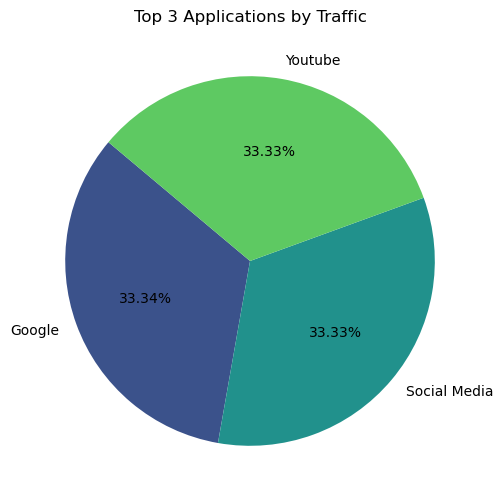

In [60]:
plt.figure(figsize=(10, 6))
plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title('Top 3 Applications by Traffic')
plt.show()

Purpose: Created a pie chart to visualize the proportion of total traffic consumed by the top 3 applications.

Details: Provides a clear visual representation of the traffic distribution among the top applications.

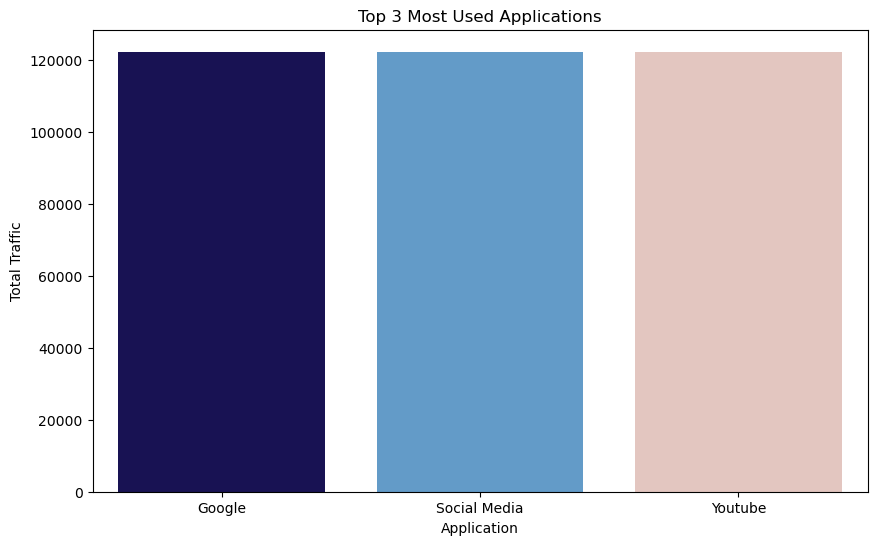

In [61]:
num_colors = len(top_3_apps)
colors = np.random.rand(num_colors, 3)  # Generate random colors

plt.figure(figsize=(10, 6))

palette = sns.color_palette(colors)

# Use the palette parameter to specify the colors for the bars
sns.barplot(x=top_3_apps['Application'], y=top_3_apps['TotalTraffic'], palette=colors)
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic')
plt.show()

Purpose: Create a bar plot of the top 3 applications by total traffic.

Details: Shows the traffic consumption for each of the top 3 applications, making comparisons easy.

In [62]:
# Elbow Method for Optimal Number of Clusters

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

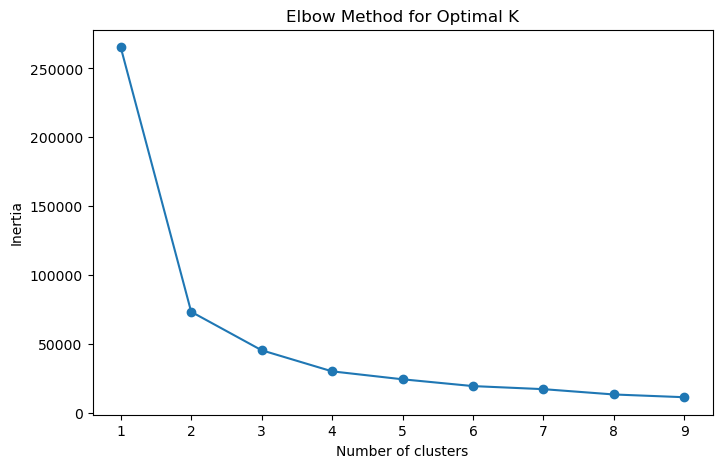

In [63]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Purpose: Used Elbow Method to determine the optimal number of clusters for K-Means clustering.

Details: Ploted the inertia (sum of squared distances) for different numbers of clusters to help identify the "elbow" point where adding more clusters yields diminishing returns.

In [64]:
t2 = t2.apply(pd.to_numeric, errors='coerce')
t2 = t2.fillna(0)


# Scale the data
scaled_data = StandardScaler().fit_transform(t2)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
t2['cluster'] = kmeans.predict(scaled_data)
t2.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,TotalTraffic,Social Media,Google,Email,Youtube,Netflix,Gaming,Other,Total,cluster
0,0,"13,114,483,460,844,900,352.00",0.00,0.77,0.00,0.66,0.98,0.00,0.34,0.36,...,0.78,0.80,0.45,1.14,0.80,0.79,1.20,0.74,0.78,1
1,1,"13,114,483,482,878,900,224.00",0.00,0.24,0.00,0.61,0.73,0.00,0.43,0.36,...,1.39,0.65,0.53,0.50,1.74,1.57,0.79,1.53,1.39,0
2,2,"13,114,483,501,243,799,552.00",0.00,0.61,0.00,0.17,0.56,0.00,0.34,0.88,...,0.66,0.48,0.90,0.78,0.40,1.39,0.90,1.60,0.66,1
3,3,"13,042,425,910,865,399,808.00",0.00,0.59,0.00,0.51,0.51,0.00,0.86,0.87,...,1.60,1.74,0.74,1.38,1.42,0.84,1.86,1.10,1.60,0
4,4,"13,042,425,914,669,299,712.00",0.00,0.00,0.00,0.28,0.46,0.00,0.31,0.36,...,1.19,1.10,0.79,0.41,1.00,0.57,1.06,0.85,1.19,0


Purpose: Applied K-Means clustering to the full dataset and assign clusters.

Details:

Converts all data to numeric, fills missing values with 0, and scales the data.
Applies K-Means clustering and assigns each record a cluster label.

In [65]:
# Save eng df for further use
t2.to_csv('C:/Users/vipin/OneDrive/Documents/Desktop/Project5/Notebook/eng_df.csv',index=False)

Purpose: Save the clustered DataFrame t2 to a CSV file for further use.